# Load and plot dataset

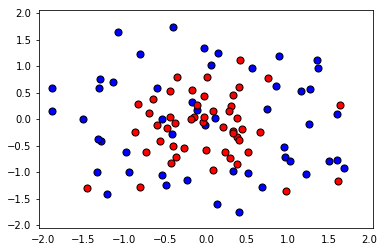

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

    return X,y

X, y = load_pts('data/blur_nested_circles.csv')
plt.show()

# Split data into train test set
Use seed 42 to have consistent random number generation.

In [2]:
from sklearn.model_selection import train_test_split
import random

random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Grid Search to find best model

In [3]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

tuning_parameters = {'max_depth':[2,4,6,8,10],
                     'min_samples_leaf':[2,4,6,8,10], 
                     'min_samples_split':[2,4,6,8,10]}

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(model, tuning_parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

print('grid_fit.best_estimator_: ', grid_fit.best_estimator_)
print('grid_fit.best_score_: ', grid_fit.best_score_)
print('grid_fit.best_params_: ', grid_fit.best_params_)

grid_fit.best_estimator_:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
grid_fit.best_score_:  0.712401477833
grid_fit.best_params_:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


# Difference between default and tuned model

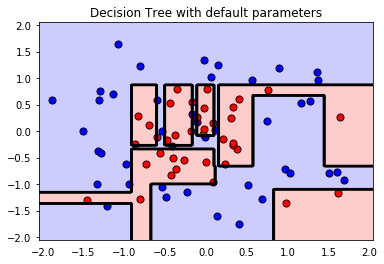

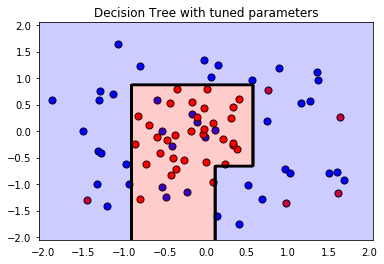

In [4]:
# Plot 2D dataset with decision boundaries of classifier
def plot_model(model, X, y, title):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = model.predict(h)

    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.title(title)
    plt.show()
    
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
plot_model(model, X_train, y_train, 'Decision Tree with default parameters')

model = grid_fit.best_estimator_
model.fit(X_train, y_train)
plot_model(model, X_train, y_train, 'Decision Tree with tuned parameters')